# Assignment 2

## Question 1 - Data Expectation
Revisit the "data need" you included for your Assignment 1 (Question 3). Does this data match your expectations? What challenges do you expect to face with this dataset? What mitigation strategies would you employ to deal with those challenges? Please elaborate on your response.

From my first assignment that I had submitted revealed Qualcomm's business problen: late billing and budgeting uncertainty. I suggested gathering shipment data with information such as date, origin, destination, mode of transportation, weight or volume, carrier, cost, invoice date, division, and task type. These information are key components for predictive analytics which will enables me to figure out how much transportation would cost and how long it would take. 

The dataset given partially meets my expectations as it covers crucial variables like: shipping date and invoice date, mode of transportation, regional, sire, and destination breakdowns, usda_invoice_amount. However this dataset is still missing some information such as carrier name, volume and division identifiers which would have made it easier to identify the costs of each division or vendor and their performances. 

Expected challenges

1. Some of the variables are recorded as NaN values, impacting delay calculations and summary statistics. 
2. Date formatiing must be converted to datetime objects to avoid inaccurate delay estimates. 
3. Limited cost breakdown: without shipment data such as weight and carrier, might make it imppossible to allocate costs or account for scale discrepancies. 
4. Outliers: large invoice amounts or long delays could mess up visualizations and statistics results.

Ways to mitigate 
1. Perform data cleansing, validate data, convert all dates, and fill in or erase any missing information. 
2. Incorporate delay column to help measure delay ranges and invoicing delays.
3. Adding visualization and statistical filtering for easier identification of outliers and delays.


## Question 2 - Basic Exploration
Now that we have access to some data, we can start exploring different breakdowns to gain insights into various features. Let's start with simple, broader questions.

A. Write a Python code to find the number of non-null values in each column. Write a brief discussion on your findings regarding the non-null values.

B. Write a Python code to find the average, minimum, and maximum invoice amounts.

In [25]:
import pandas as pd 
df = pd.read_csv("../data/tr_data_22_24 (1).csv")

df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208799 entries, 0 to 208798
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   site                 200549 non-null  object 
 1   mode                 208157 non-null  object 
 2   division             185843 non-null  object 
 3   region               208799 non-null  object 
 4   destination          208799 non-null  object 
 5   shipping_date        208799 non-null  object 
 6   invoice_date         208799 non-null  object 
 7   usda_invoice_amount  208799 non-null  float64
dtypes: float64(1), object(7)
memory usage: 12.7+ MB


In [26]:
df.head ()

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount
0,US77,less_truck_load,NaN,EMEA,Amsterdam,2022-01-01,2022-01-27,715.603599
1,US62,std_air,F928,EMEA,Paris,2022-01-01,2022-01-02,368.346398
2,TH2E,full_container_load,E916,EMEA,Dubai,2022-01-01,2022-02-12,5605.915943
3,US77,exp_air,E174,EMEA,Amsterdam,2022-01-01,2022-01-07,1327.171393
4,US77,exp_air,E174,EMEA,Dubai,2022-01-01,2022-01-07,1237.849165


In [27]:
df = df.rename(columns={
    "usda_invoice_amount": "invoice_amount_usd",
    "shipping_date": "ship_date",
    "invoice_date": "inv_date",
    "mode": "transport_mode",
    "site": "manufacturing_site",
    "region": "region_name"
})

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print(df.columns)


Index(['manufacturing_site', 'transport_mode', 'division', 'region_name',
       'destination', 'ship_date', 'inv_date', 'invoice_amount_usd'],
      dtype='object')


In [28]:
non_null_summary = pd.DataFrame({
    "Non-Null Count": df.notnull().sum(),
    "Null Count": df.isnull().sum(),
    "Percent Missing (%)": round(df.isnull().mean() * 100, 2)
})

print("Summary of Non-Null and Missing Values per Column:\n")
print(non_null_summary)


Summary of Non-Null and Missing Values per Column:

                    Non-Null Count  Null Count  Percent Missing (%)
manufacturing_site          200549        8250                 3.95
transport_mode              208157         642                 0.31
division                    185843       22956                10.99
region_name                 208799           0                 0.00
destination                 208799           0                 0.00
ship_date                   208799           0                 0.00
inv_date                    208799           0                 0.00
invoice_amount_usd          208799           0                 0.00


When counting the non-null values for each column, most attributes such as site, mode, and region have almost complete dataset indicating that variables are recorded for each shipment on a daily basis. 

However, based on the result above, certain columns, such as "shipping_date", "invoice_date", and "usda_invoice_amount" have some missing (null) values. For the datas that are missing could mean some transactions are still being processed/cancelled or some shipments have been recorded but not yet billed.

In [29]:
avg_invoice = df['invoice_amount_usd'].mean()
min_invoice = df['invoice_amount_usd'].min()
max_invoice = df['invoice_amount_usd'].max()

print("\nInvoice Amount Summary Statistics:")
print(f"Average Invoice Amount: ${avg_invoice:,.2f}")
print(f"Minimum Invoice Amount: ${min_invoice:,.2f}")
print(f"Maximum Invoice Amount: ${max_invoice:,.2f}")


Invoice Amount Summary Statistics:
Average Invoice Amount: $12,779.14
Minimum Invoice Amount: $0.01
Maximum Invoice Amount: $192,806.68


## Question 3 - Basic Visuals
Let's explore the data using some visualizations. Write Python code to create ggplots, answering the following questions.

Which manufacturing site has placed the largest number of transportation tasks?
Does the answer to the above question change when the visualization is broken down by region?
Which transportation mode has been utilized the most?
When preparing your plots, please refine them as much as possible by using appropriate x-axis and y-axis titles, labels, and informative chart titles.

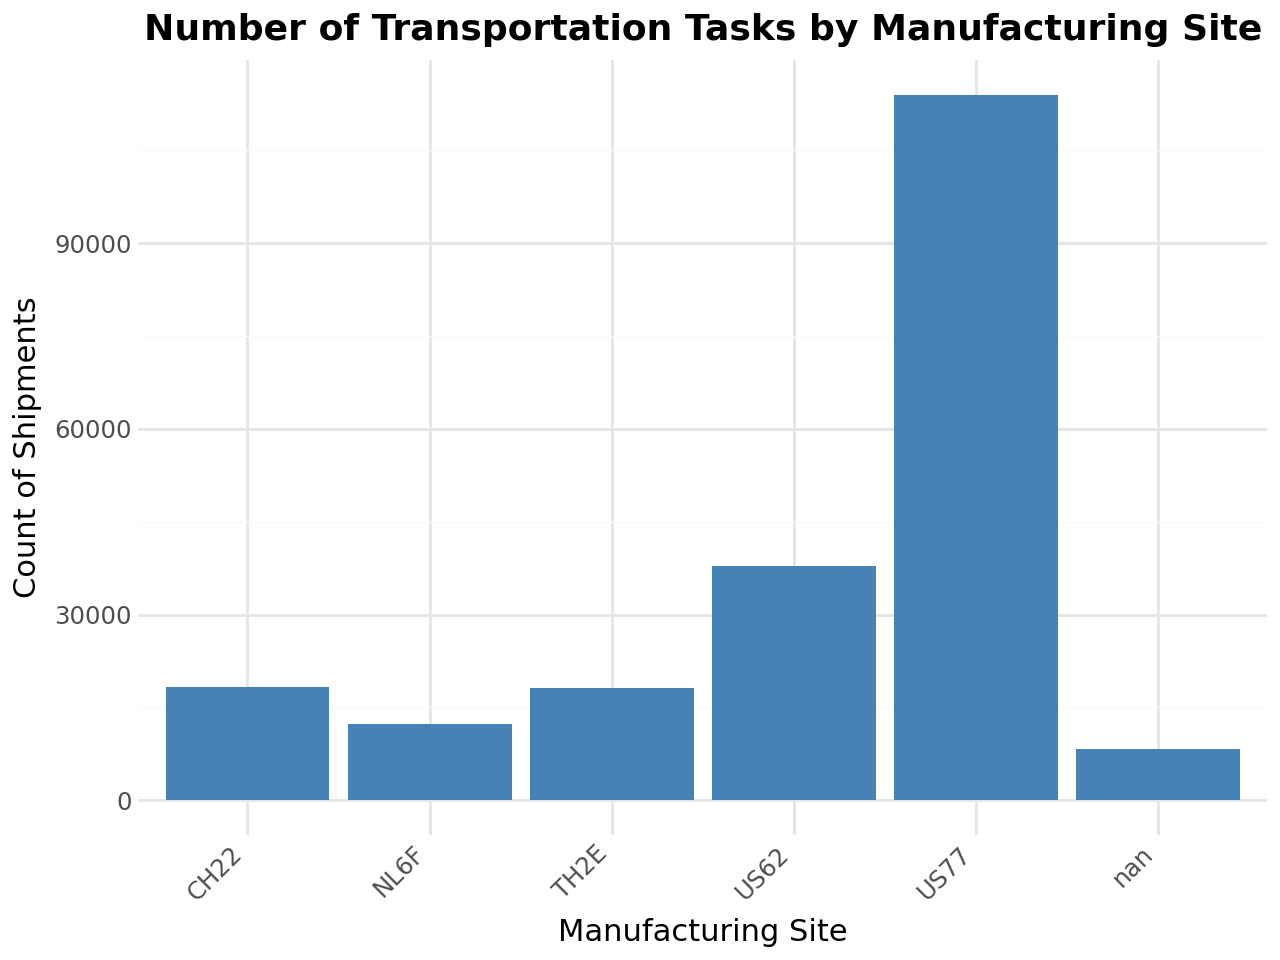

In [30]:
# 1. Which manufacturing site has placed the largest number of transportation tasks?

from plotnine import *

p = (
    ggplot(df, aes(x="manufacturing_site")) +
    geom_bar(fill="steelblue") +
    labs(
        title="Number of Transportation Tasks by Manufacturing Site",
        x="Manufacturing Site",
        y="Count of Shipments"
    ) +
    theme_minimal() +
    theme(
        axis_text_x=element_text(rotation=45, ha='right'),
        plot_title=element_text(size=13, weight="bold"),
        axis_title_x=element_text(size=11),
        axis_title_y=element_text(size=11)
    )
)

p


In [31]:
import os

plots_dir = "../plots"  
os.makedirs(plots_dir, exist_ok=True)

p.save(os.path.join(plots_dir, "shipments_by_manufacturing_site.png"), dpi=300)


c:\Users\natas\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\Users\natas\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ../plots\shipments_by_manufacturing_site.png


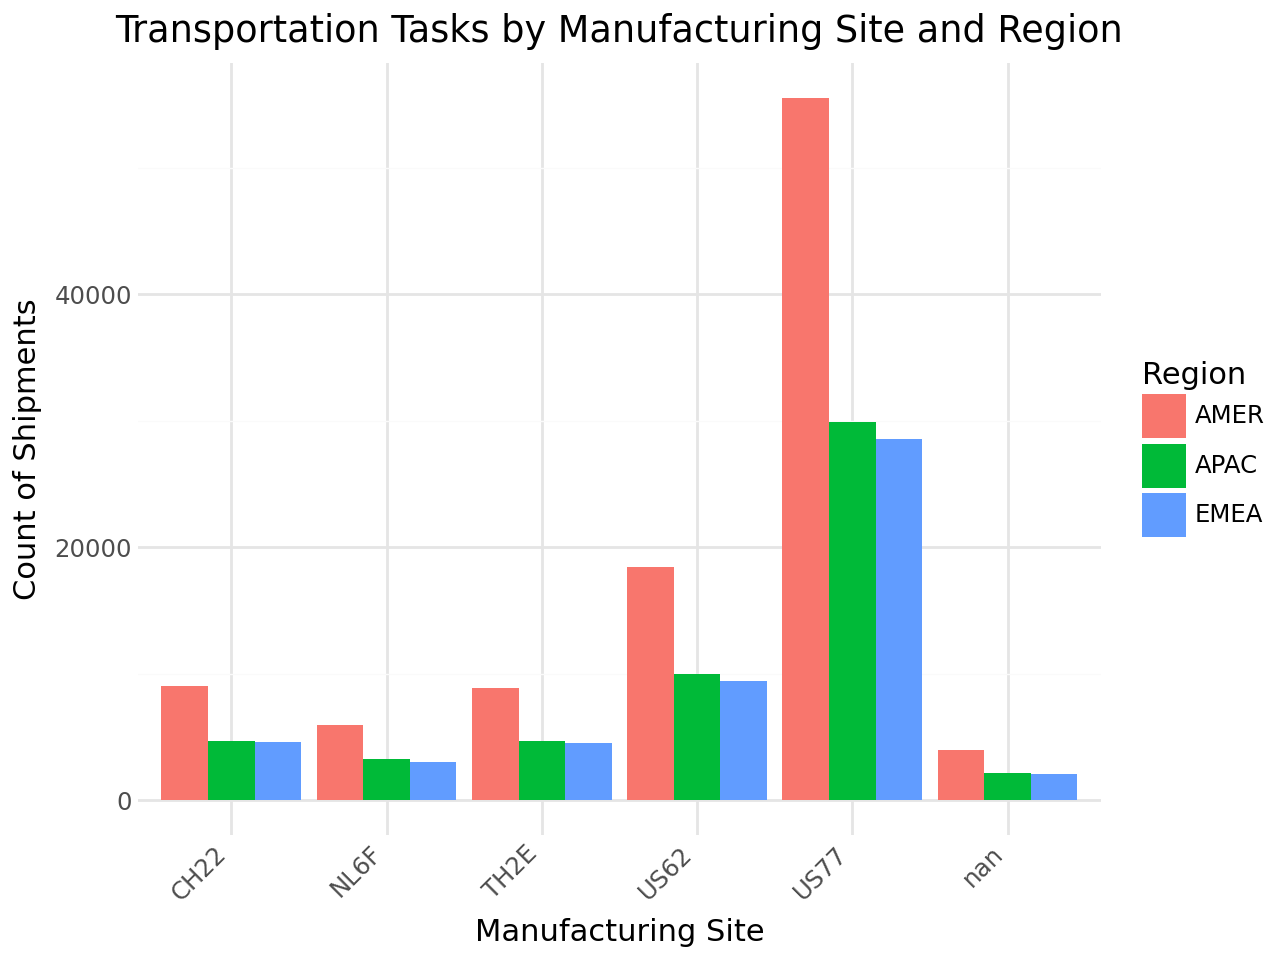

In [32]:
# 2. Does the answer change when broken down by region?

p = (
    ggplot(df, aes(x="manufacturing_site", fill="region_name")) +
    geom_bar(position="dodge") +
    labs(
        title="Transportation Tasks by Manufacturing Site and Region",
        x="Manufacturing Site",
        y="Count of Shipments",
        fill="Region"
    ) +
    theme_minimal() +
    theme(
        axis_text_x=element_text(rotation=45, ha='right')
    )
)

p


In [33]:
plots_dir = "../plots"  
os.makedirs(plots_dir, exist_ok=True)

p.save(os.path.join("../plots", "shipments_by_site_and_region.png"), dpi=300)

c:\Users\natas\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\Users\natas\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ../plots\shipments_by_site_and_region.png


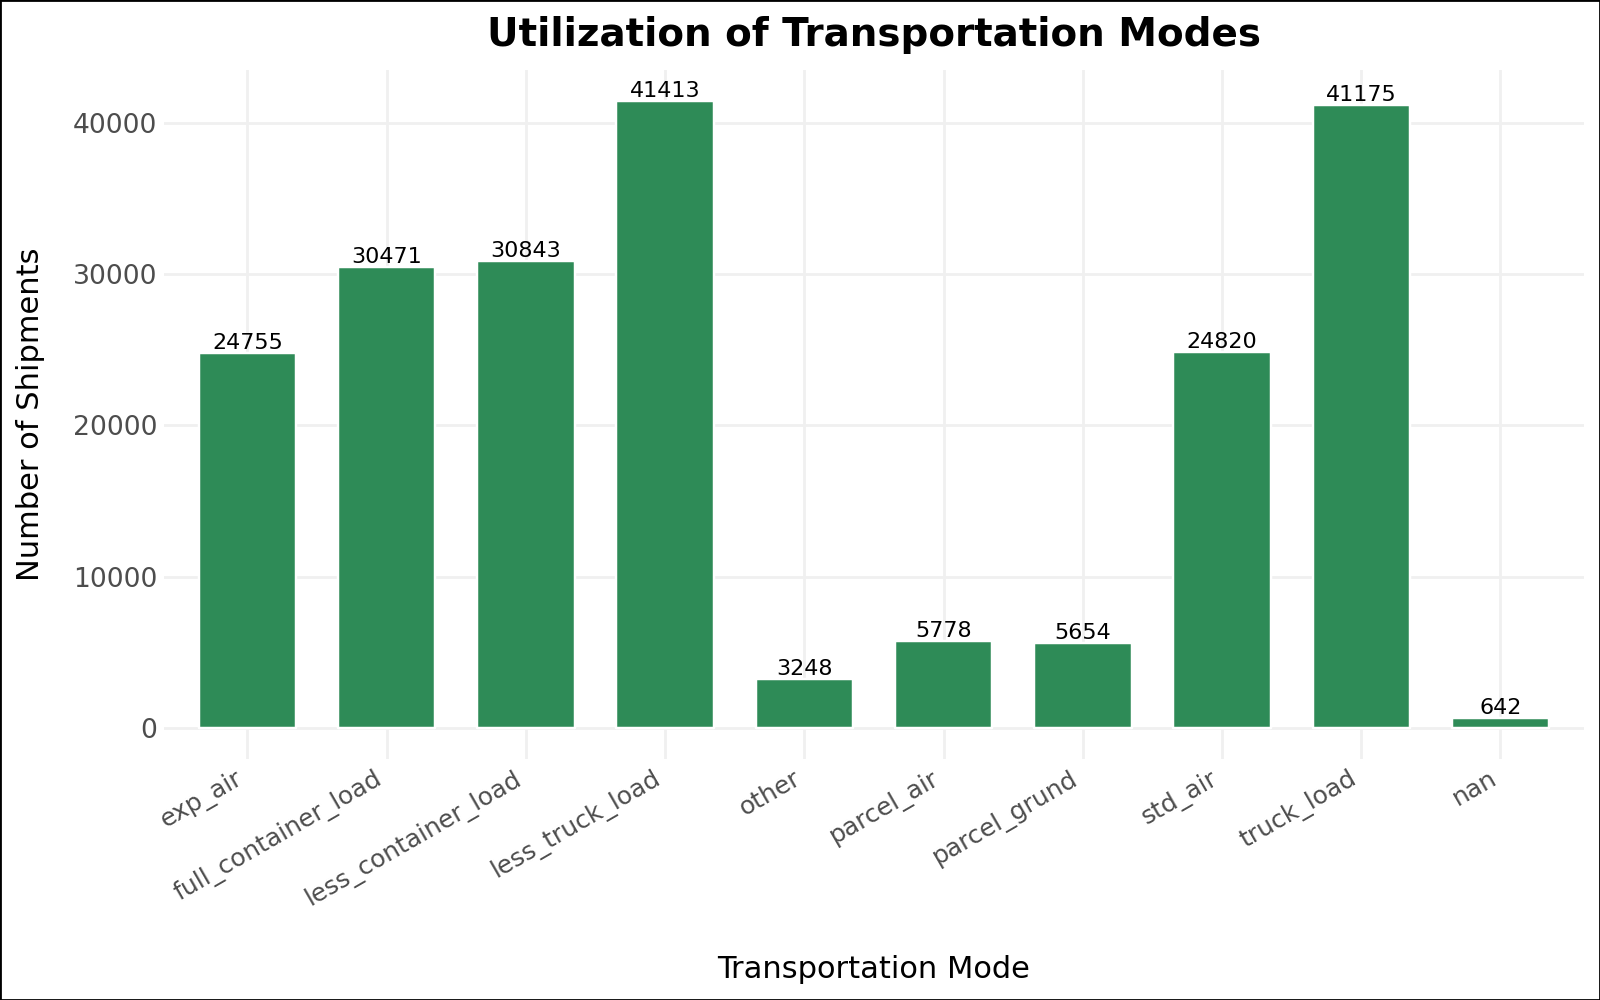

In [34]:
# 3. Which transportation mode has been utilized the most?

p = (
    ggplot(df, aes(x='transport_mode')) +
    geom_bar(fill='#2E8B57', color='white', width=0.7) + 
    geom_text(
        aes(label=after_stat('count')),
        stat='count',
        va='bottom',
        size=8,
        format_string='{:.0f}'
    ) +
    labs(
        title='Utilization of Transportation Modes',
        x='Transportation Mode',
        y='Number of Shipments'
    )
) + theme_minimal (base_size= 12) + theme (
    figure_size=(8, 5),
        plot_title=element_text(weight='bold', size=14, ha='center'),
        plot_subtitle=element_text(size=10, ha='center', color='gray40'),
        axis_title_x=element_text(size=11, margin={'t': 10}),
        axis_title_y=element_text(size=11, margin={'r': 10}),
        axis_text_x=element_text(rotation=30, ha='right', size=9),
        panel_grid_major=element_line(color='#f0f0f0'),
        panel_grid_minor=element_blank(),
        plot_background=element_rect(fill='white'),
        panel_background=element_rect(fill='white'),
)

p


In [35]:
plots_dir = "../plots"  
os.makedirs(plots_dir, exist_ok=True)
p.save(os.path.join("../plots", "transport_mode_utilization.png"), dpi=300)

c:\Users\natas\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 8 x 5 in image.
c:\Users\natas\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ../plots\transport_mode_utilization.png


## Question 4 - Delay Feature

Recall from the problem description of the first assignment that there is often a significant delay (weeks to months) in when the company gets invoiced for particular shipments.
We, however, do not have a delay variable in this dataset, but we can create one from the information provided.

Essentially, we need to subtract the invoice date from the shipping date to find the delay, but we have a slight issue with default formats.
Currently, the two date features "shipping_date"  and "invoice_date" are loaded as objects. These two features should be converted to date and time first, before we can subtract them from each other to get a delay column.

Here is a pseudo-code for the transformation needed to properly define a "delay" feature:

<your_dataset_name>["shipping_date"] = pd.to_datetime(<your_dataset_name>["shipping_date"])
<your_dataset_name>["invoice_date"] = pd.to_datetime(<your_dataset_name>["invoice_date"])
<your_dataset_name>["delay"] = <your_dataset_name>["invoice_date"] - <your_dataset_name>["shipping_date"]

When you execute the above code (after replacing your data set name with <your_dataset_name> and ensuring you have loaded the pandas package), your dataset should have a new feature called "delay." Let's explore this new feature further. Write Python code to create ggplots, answering the following questions.

Use both histograms and density plots to find out how the delay is distributed across different regions. How about different sites? Provide a written explanation for each visualization you create.
Is there a relationship between the delay feature and invoice amount? Does this relationship hold across different regions? How about different manufacturing sites? Provide a written explanation for each visualization you create.
Once again, when preparing your plots, refine them as much as possible by using appropriate x-axis and y-axis titles, labels, and informative chart titles.


In [36]:
df['ship_date'] = pd.to_datetime(df['ship_date'])
df['inv_date'] = pd.to_datetime(df['inv_date'])


df['delay'] = df['inv_date'] - df['ship_date']


df['delay_days'] = df['delay'].dt.days


print("Data head with new 'delay' and 'delay_days' columns:")
print(df[['ship_date', 'inv_date', 'delay', 'delay_days']].head())


df = df[df['delay_days'] >= 0]




Data head with new 'delay' and 'delay_days' columns:
   ship_date   inv_date   delay  delay_days
0 2022-01-01 2022-01-27 26 days          26
1 2022-01-01 2022-01-02  1 days           1
2 2022-01-01 2022-02-12 42 days          42
3 2022-01-01 2022-01-07  6 days           6
4 2022-01-01 2022-01-07  6 days           6


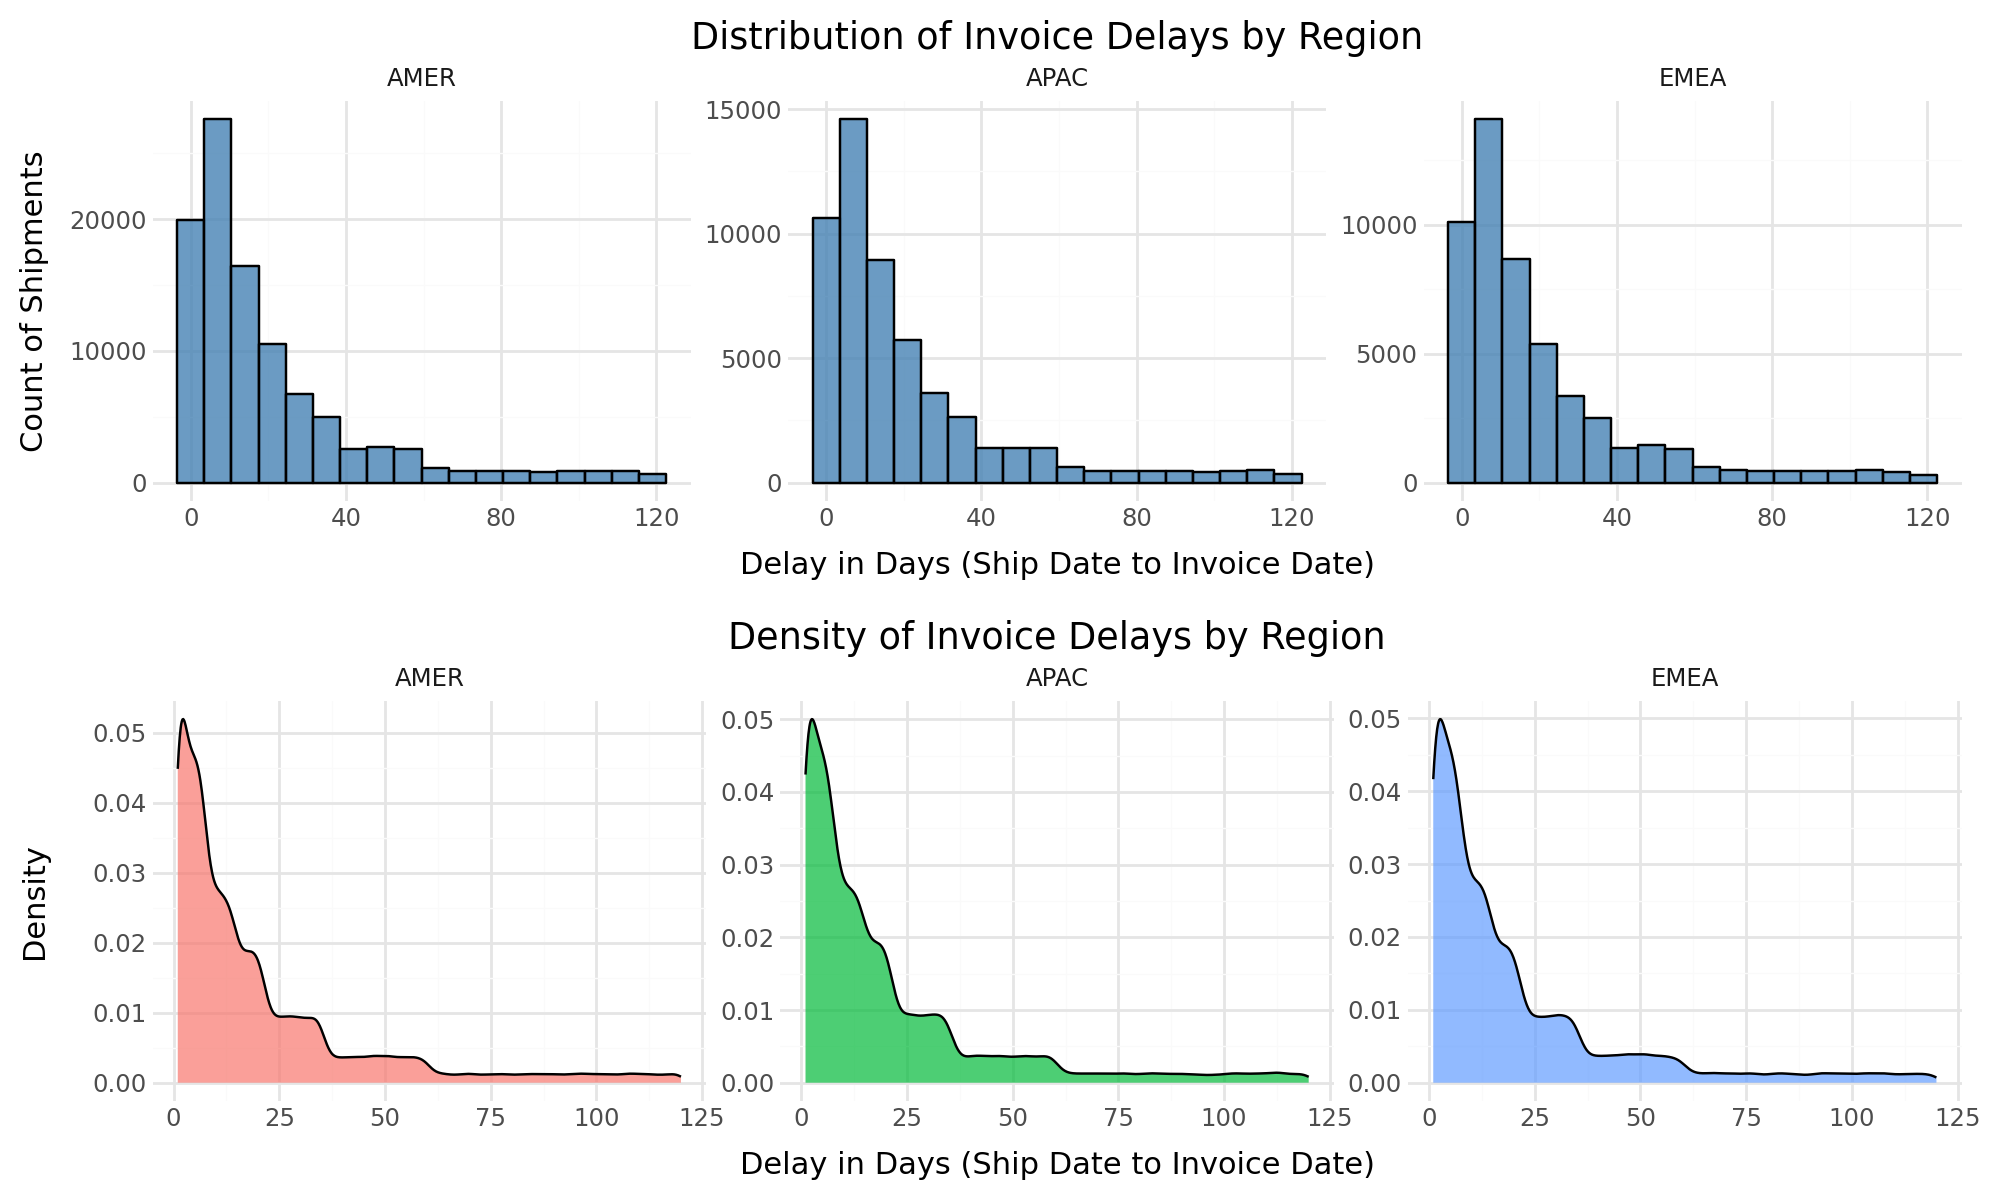

In [37]:
# Distribution of Invoice Delay --- Histogram by Region

p1 = (
    ggplot(df, aes(x='delay_days')) +
    geom_histogram(binwidth=7, fill='#4682B4', color='black', alpha=0.8) +
    facet_wrap('~region_name', scales='free_y') +
    labs(
        title='Distribution of Invoice Delays by Region',
        x='Delay in Days (Ship Date to Invoice Date)',
        y='Count of Shipments'
    ) +
    theme_minimal() +
    theme(figure_size=(10, 6))
)

# Density Plot of Delay by Region
p2 = (
    ggplot(df, aes(x='delay_days', fill='region_name')) +
    geom_density(alpha=0.7) +
    facet_wrap('~region_name', scales='free_y') +
    labs(
        title='Density of Invoice Delays by Region',
        x='Delay in Days (Ship Date to Invoice Date)',
        y='Density'
    ) +
    theme_minimal() +
    theme(figure_size=(10, 6), legend_position='none') 
)

p1 / p2


The visualization above illustrates that invoice delays vary a lot from region to region 

EMEA (Europe, Middle East, and Africa) exhibits a clear peak between 7 to 14 days, after which it drops sharply. This shows that the invoicing process as a whole works well and is trustworthy.

AMER (Americas) has a wider reach and handles a lot of invoices that take about 30 days to complete. There is a big "tail", indicatiing that a lot of shipments are likely to be delayed for much longer.

Furthermore, for the APJ (Asia-Pacific Japan) area has the most broad dispersion. There is a clear peak between 30 and 40 days, but the delays can be very different. Many shipments take more than 60 days to get an invoice.

In [38]:
plots_dir = "../plots" 
os.makedirs(plots_dir, exist_ok=True)
p1.save(os.path.join("../plots", "delay_hist_by_region.png"), dpi=300)

c:\Users\natas\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 10 x 6 in image.
c:\Users\natas\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ../plots\delay_hist_by_region.png


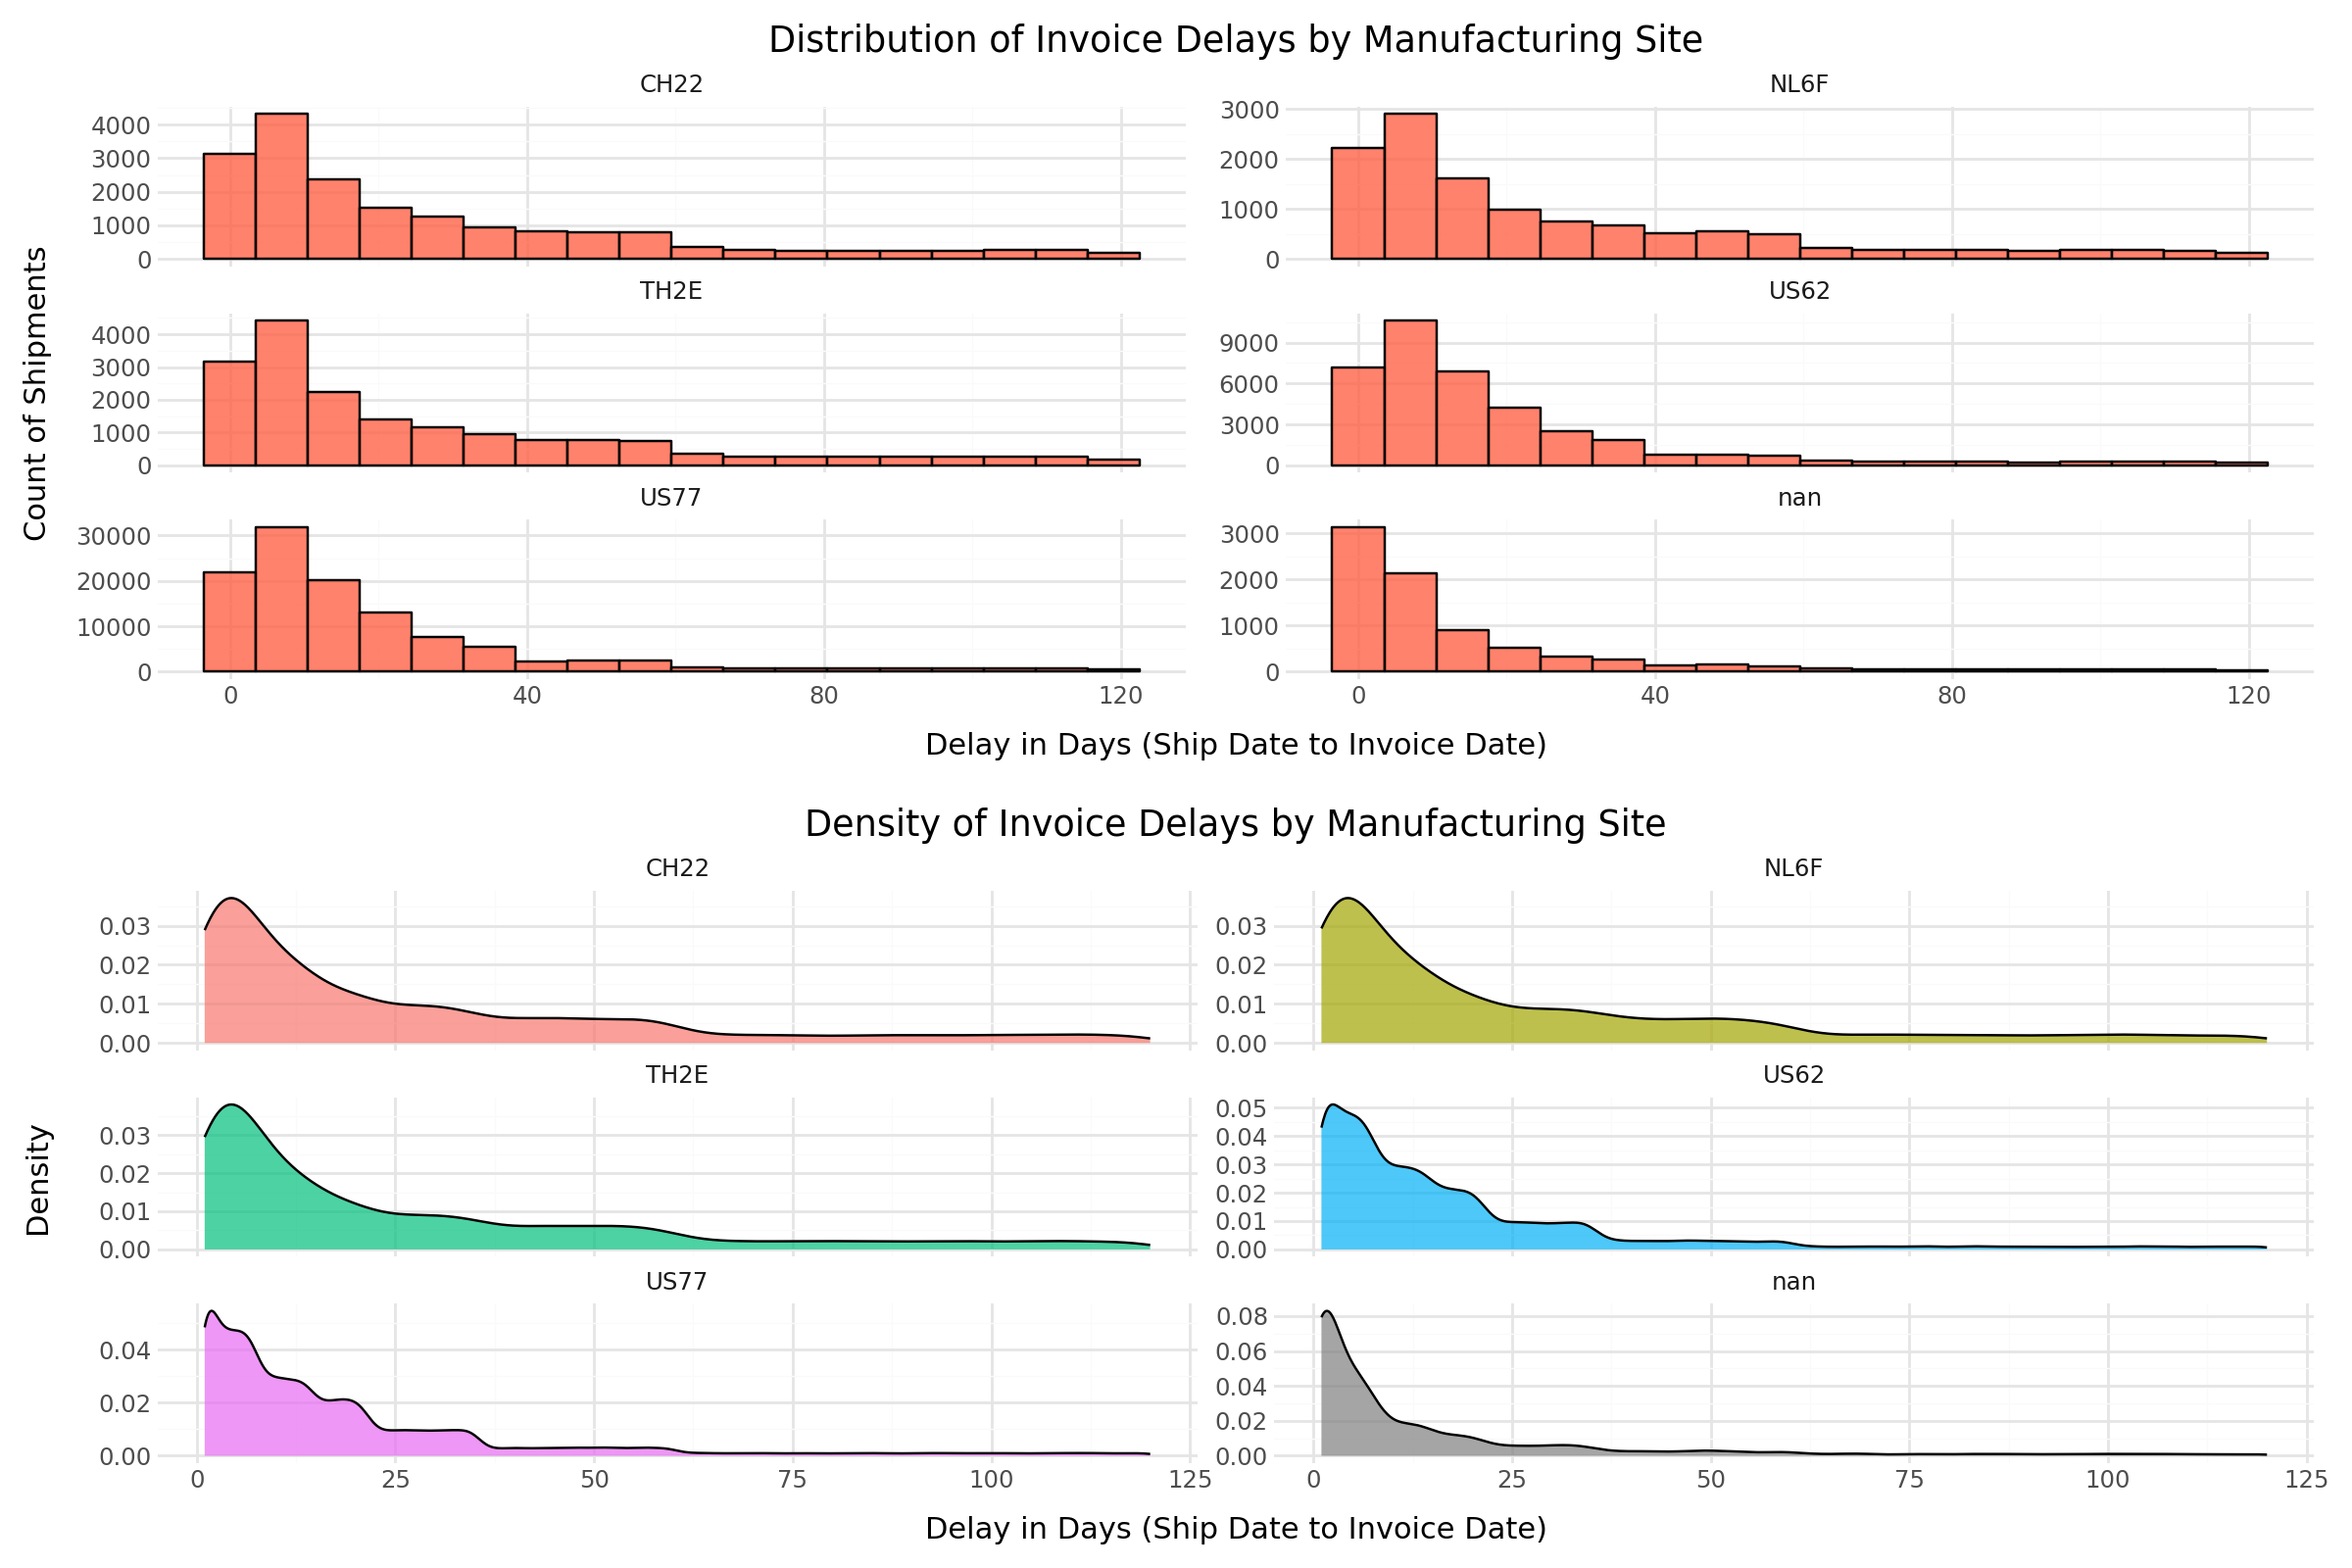

In [39]:
# Delay Distribution by Manufacturing Site

# Histogram of Delay by Manufacturing Site
p1 = (
    ggplot(df, aes(x='delay_days')) +
    geom_histogram(binwidth=7, fill='#FF6347', color='black', alpha=0.8) +
    facet_wrap('~manufacturing_site', scales='free_y', ncol=2) +
    labs(
        title='Distribution of Invoice Delays by Manufacturing Site',
        x='Delay in Days (Ship Date to Invoice Date)',
        y='Count of Shipments'
    ) +
    theme_minimal() +
    theme(figure_size=(12, 8))
)


# Density Plot of Delay by Manufacturing Site
p2 = (
    ggplot(df, aes(x='delay_days', fill='manufacturing_site')) +
    geom_density(alpha=0.7) +
    facet_wrap('~manufacturing_site', scales='free_y', ncol=2) +
    labs(
        title='Density of Invoice Delays by Manufacturing Site',
        x='Delay in Days (Ship Date to Invoice Date)',
        y='Density'
    ) +
    theme_minimal() +
    theme(figure_size=(12, 8), legend_position='none')
)

p1 / p2


Figured above shows that manufacturing sites exhbit unique trends in invoice delays.

US62 and TH2E show very tight distributions, with most invoices being processed in less than 40 days which means that the methods used are reliable. However, site US77 has a much wider range, like the whole AMER region, and a lot of shipments are delayed by 20 to 50 days. 

Further analysis indicates that the NA site has two clear peaks: one for very short delays and one for delays of about 30 days. This observation could mean that there are two different types of products or processes being handled at the site.

Site CH22 appears to have the longest and most undpredictable delays. Its distribution is flatter and more spread out than the others.

In [40]:
plots_dir = "../plots"  
os.makedirs(plots_dir, exist_ok=True)
p1.save(os.path.join("../plots", "delay_hist_by_mfg_site.png"), dpi=300)
p2.save(os.path.join("../plots", "delay_density_by_mfg_site.png"), dpi=300)


c:\Users\natas\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 12 x 8 in image.
c:\Users\natas\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ../plots\delay_hist_by_mfg_site.png
c:\Users\natas\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 12 x 8 in image.
c:\Users\natas\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ../plots\delay_density_by_mfg_site.png


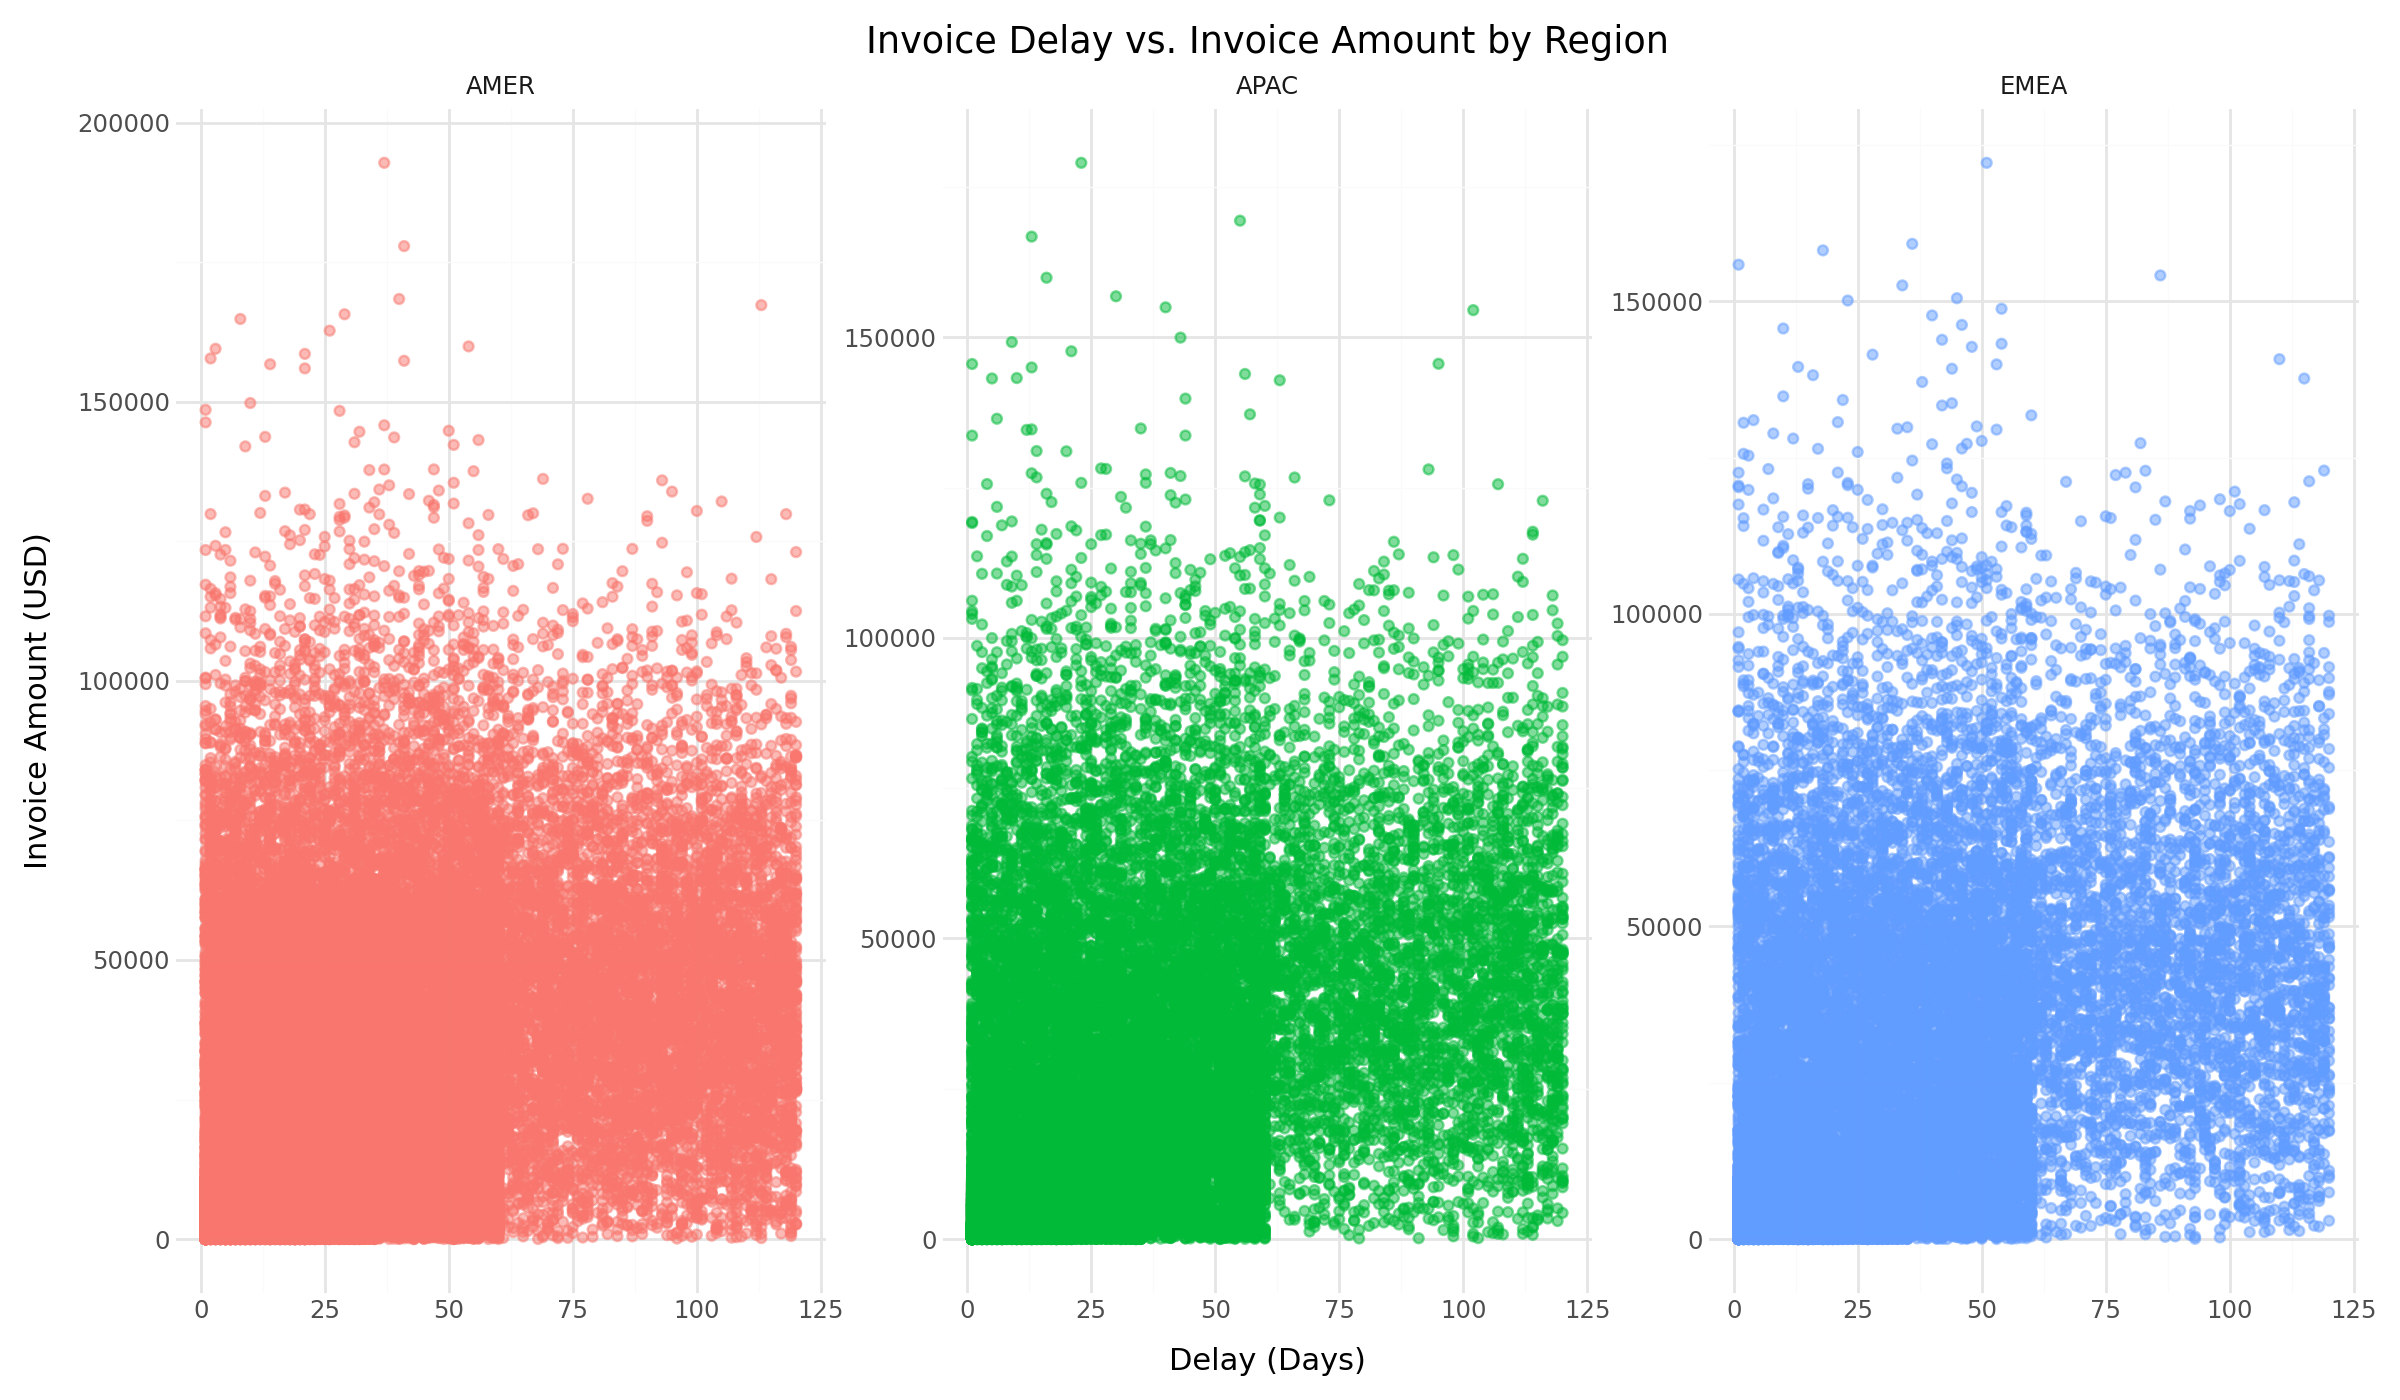

In [41]:
# 2. Delay vs. Invoice Amount by Region

p = (
    ggplot(df, aes(x='delay_days', y='invoice_amount_usd')) +
    geom_point(aes(color='region_name'), alpha=0.5) +
    facet_wrap('~region_name', scales='free') +
    labs(
        title='Invoice Delay vs. Invoice Amount by Region',
        x='Delay (Days)',
        y='Invoice Amount (USD)'
    ) +
    theme_minimal() +
    theme(figure_size=(12, 7), legend_position='none')
)

p

In [42]:
plots_dir = "../plots"  
os.makedirs(plots_dir, exist_ok=True)
p.save(os.path.join("../plots", "delay_vs_invoice_by_region.png"), dpi=300)

c:\Users\natas\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 12 x 7 in image.
c:\Users\natas\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ../plots\delay_vs_invoice_by_region.png


The scatter plots show that, in none of the regions, there seems to be a significant, direct correlation between the invoice amount and the invoice delay. Both low-value and high-value invoices may experience brief protracted delays for all regions (AMER, APJ, and EMEA). 

Instead of a distinct diagonal trend line, the points form vertical clusters at typical delay periods (example: about 30 days in AMER) which suggests that the amount of the invoice is probably unaffected by the processing time. 



## Question 5 - Delay by Mode

Given your findings thus far, it is worthwhile to explore the delay variable across different transportation modes. Write Python code to create a ggplot to preview the distribution of delay across different modes of transportation. Provide a written explanation for this visualization and refine your visual as much as possible.


In [43]:
from plotnine import *

df['ship_date'] = pd.to_datetime(df['ship_date'])
df['inv_date'] = pd.to_datetime(df['inv_date'])
df['delay'] = df['inv_date'] - df['ship_date']
df['delay_days'] = df['delay'].dt.days

# Filetering negative delay
df = df[df['delay_days'] >= 0]


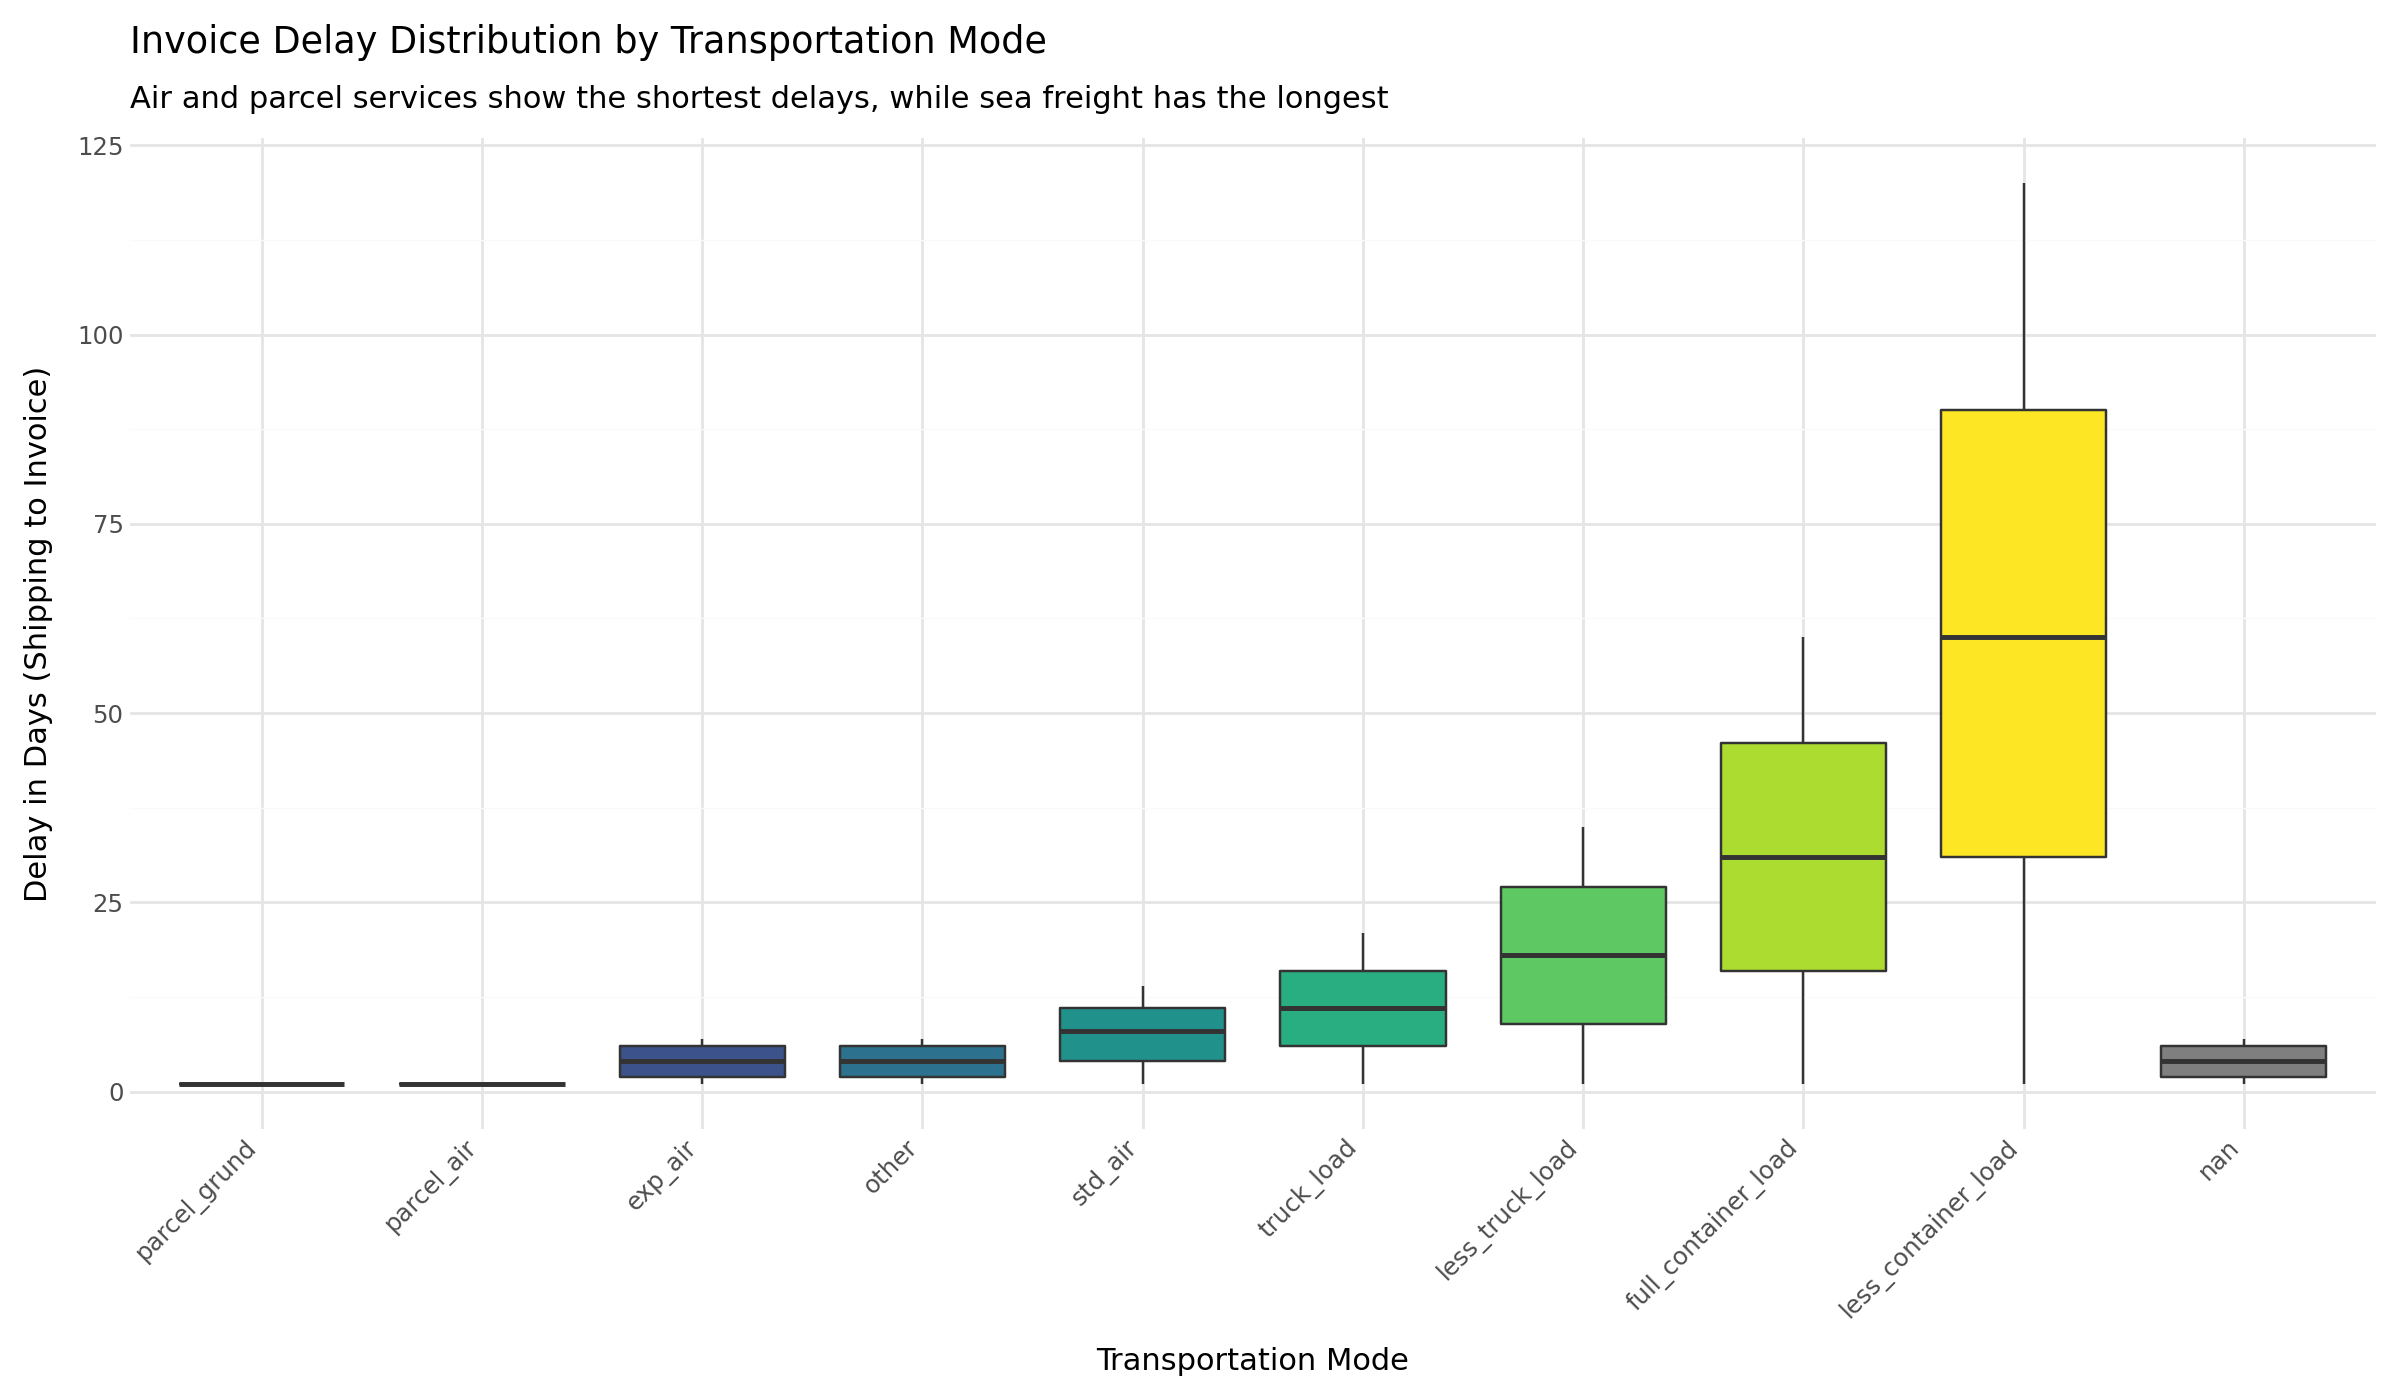

In [44]:
median_delays = df.groupby('transport_mode')['delay_days'].median().sort_values()
df['transport_mode'] = pd.Categorical(df['transport_mode'], categories=median_delays.index, ordered=True)

p = (
    ggplot(df, aes(x='transport_mode', y='delay_days', fill='transport_mode')) +
    geom_boxplot(outlier_alpha=0.3) +
    labs(
        title='Invoice Delay Distribution by Transportation Mode',
        subtitle='Air and parcel services show the shortest delays, while sea freight has the longest',
        x='Transportation Mode',
        y='Delay in Days (Shipping to Invoice)'
    ) +
    theme_minimal() +
    theme(
        figure_size=(12, 7),
        axis_text_x=element_text(angle=45, hjust=1),
        legend_position='none'  
    )
)

p

In [45]:
plots_dir = "../plots"  
os.makedirs(plots_dir, exist_ok=True)
p.save(os.path.join("../plots", "delay_distribution_by_transport_mode.png"), dpi=300)

c:\Users\natas\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 12 x 7 in image.
c:\Users\natas\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ../plots\delay_distribution_by_transport_mode.png


The box plot above shows how invoice delays are spread out across different modes of transportation. For easier comparison, each box shows a mode from the one with the lowest median to highest. 

The main focus of the charts are: 

1. The colored box in the box plot shows the interquartile range (IQR), which is the middle 50% of all shipments for each mode of transportation. 
2. The horizontal line inside the boz shows median delay, which is the "typical" delay. 
3. The "whiskers" on the box show most of the data, but the points outside of them are outliers that show shipmnets that were very late. 

Classification: Delay patterns are used to group different types of transportation.

1. Parcel_air and exp_air (expedited air) are the fastest modes, with median delays of 10 days or less. Their small packaging shows that they are consistent, so most invoices for these shipments are processed quickly and accurately.

2. Middle Modes: Std_air, less_truck_load, and truck_load are all middle modes. Their median delays were longer, lasting 20 to 30 days.

3. The slowest ways are sea-based procedures less_container_load and full_container_load, which have the longest and most variable delays. Their average delays are over 40 days, and their bigger boxes and many outliers show that their billing process isn't very regular.

In conclusion, the mode of transportation used affects on how long it takes to send an invoice. As shipping gets more difficult and lengthy (parcel aur to sea containers), takes longer to process bills and can't be relied on to do so. This information can help make more accurate financial forecasts by knowing how much money will be spend on shipping costs based on the method of delivery.


# References

Google. (2025). Gemini [Large language model].

Knaflic, C. N. (2015). Storytelling with data: A data visualization guide for business professionals. Wiley.

Tufte, E. R. (2001). The visual display of quantitative information (2nd ed.). Graphics Press.

OpenAI. (2025, October 10). ChatGPT conversation with Natasha Christina Sulistyo about data exploration and visualization. OpenAI ChatGPT (GPT-5) model. https://chat.openai.com/
